In [29]:

# Imorting the required Libraries
import pandas
import pandas as pd
import numpy as np
from tensorflow import keras
from keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers import Input, Dropout
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Reading the CSV file
dp= pd.read_csv("diabetes.csv", header=None).values

# Returns a tuple with each index having the number of corresponding elements.
print(type(dp))
print(dp.shape)

# Split arrays or matrices into random train and test subsets.
X_train, X_test, Y_train, Y_test = train_test_split(dp[:,0:8], dp[:,8], test_size=0.25, random_state=42)
# Dislaying the shape of it.
print("X_train.shape: ", X_train.shape)
print("Y_train.shape: ", Y_train.shape)
print("X_test.shape: ", X_test.shape)
print("Y_test.shape: ", Y_test.shape)



<class 'numpy.ndarray'>
(768, 9)
X_train.shape:  (576, 8)
Y_train.shape:  (576,)
X_test.shape:  (192, 8)
Y_test.shape:  (192,)


In [30]:
print(tf.__version__)

2.8.0


In [31]:
# Sequential model has a appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
my_db_nn = Sequential() # create a Sequential model

# As the dataset as 8 features input shape is 8
my_db_nn.add(Input(shape=(8,))) # Input Layer

my_db_nn.add(Dense(32, activation='relu')) # hidden layer
#activation is given as sigmoid as its a binary classification problem.
my_db_nn.add(Dense(1, activation='sigmoid')) # output layer

# Adding the loss function and optimezer
my_db_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])


print(my_db_nn.summary())





Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 32)                288       
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
None


In [32]:


# The returned history object holds a record of the loss values and metric values during training
hist =  my_db_nn_fitted = my_db_nn.fit(X_train, Y_train, epochs=100, verbose=1, shuffle=True)



Epoch 1/100
18/18 [==============================] - 0s 2ms/step - loss: 10.8584 - acc: 0.6510
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 6.0737 - acc: 0.6389
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 2.3193 - acc: 0.6163
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 1.3668 - acc: 0.5521
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 1.0648 - acc: 0.6267
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.8922 - acc: 0.6545
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.8082 - acc: 0.6615
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.7580 - acc: 0.6684
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 0.7139 - acc: 0.6753
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6803 - acc: 0.6875
Epoch 11/100
18/18 [==============================] - 0s 2

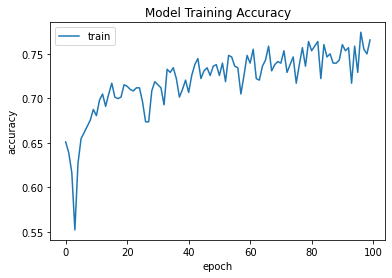

In [33]:
#Plotting the accuracy of a given model
plt.plot(hist.history['acc'])
# Adding the title for the plot
plt.title('Model Training Accuracy')
# Labeling a Eoch on X-Axis
plt.xlabel('epoch')
# Labeling Accuracy on Y-Axis
plt.ylabel('accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

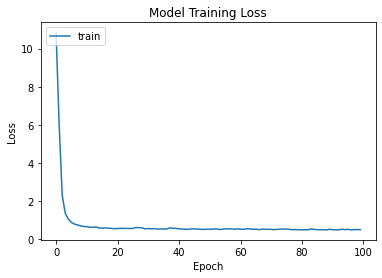

In [34]:
# Plotting the loss of a model after adding the above dense layers
plt.plot(hist.history['loss'])
plt.title('Model Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [35]:
#Loss and accuracy using evlaute
print(my_db_nn.evaluate(X_test, Y_test))

6/6 [==============================] - 0s 2ms/step - loss: 0.6163 - acc: 0.7083
[0.6163428425788879, 0.7083333134651184]


In [36]:
#adding more dense layers
# create a Sequential model
my_db_nn = Sequential() 

my_db_nn.add(Input(shape=(8,))) 
my_db_nn.add(Dense(32, activation='relu')) 
my_db_nn.add(Dense(54, activation='relu')) 
my_db_nn.add(Dense(1, activation='sigmoid'))

# Adding the optimizer and loss function for simplifying and accuracy
my_db_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
print(my_db_nn.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 32)                288       
                                                                 
 dense_17 (Dense)            (None, 54)                1782      
                                                                 
 dense_18 (Dense)            (None, 1)                 55        
                                                                 
Total params: 2,125
Trainable params: 2,125
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
hist =  my_db_nn_fitted = my_db_nn.fit(X_train, Y_train, epochs=150, verbose=1, shuffle=True)

Epoch 1/150
18/18 [==============================] - 0s 2ms/step - loss: 4.1841 - acc: 0.5677
Epoch 2/150
18/18 [==============================] - 0s 2ms/step - loss: 1.1779 - acc: 0.6354
Epoch 3/150
18/18 [==============================] - 0s 2ms/step - loss: 0.8040 - acc: 0.6684
Epoch 4/150
18/18 [==============================] - 0s 2ms/step - loss: 0.6715 - acc: 0.6684
Epoch 5/150
18/18 [==============================] - 0s 2ms/step - loss: 0.6389 - acc: 0.6719
Epoch 6/150
18/18 [==============================] - 0s 2ms/step - loss: 0.6503 - acc: 0.6684
Epoch 7/150
18/18 [==============================] - 0s 2ms/step - loss: 0.6188 - acc: 0.6979
Epoch 8/150
18/18 [==============================] - 0s 2ms/step - loss: 0.5945 - acc: 0.7101
Epoch 9/150
18/18 [==============================] - 0s 2ms/step - loss: 0.5670 - acc: 0.7135
Epoch 10/150
18/18 [==============================] - 0s 2ms/step - loss: 0.5676 - acc: 0.7083
Epoch 11/150
18/18 [==============================] - 0s 2m

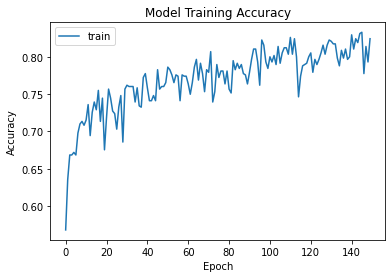

In [38]:
# Plotting the accuracy of a model after adding the above dense layers
plt.plot(hist.history['acc'])
plt.title('Model Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show()

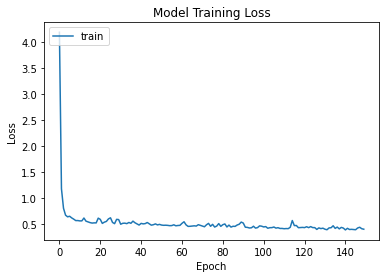

In [39]:
# Plotting the loss of a model after adding the above dense layers
plt.plot(hist.history['loss'])
plt.title('Model Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [40]:
#Loss and accuracy using evlaute
print(my_db_nn.evaluate(X_test, Y_test))

6/6 [==============================] - 0s 2ms/step - loss: 0.7047 - acc: 0.6719
[0.7046778798103333, 0.671875]


In [41]:
hist =  my_db_nn_fitted = my_db_nn.fit(X_train, Y_train, epochs=150, verbose=1, shuffle=True, validation_data=(X_test, Y_test))

Epoch 1/150
18/18 [==============================] - 0s 6ms/step - loss: 0.4100 - acc: 0.8229 - val_loss: 0.6990 - val_acc: 0.6927
Epoch 2/150
18/18 [==============================] - 0s 4ms/step - loss: 0.4638 - acc: 0.7656 - val_loss: 0.6959 - val_acc: 0.6927
Epoch 3/150
18/18 [==============================] - 0s 4ms/step - loss: 0.4628 - acc: 0.7969 - val_loss: 0.7973 - val_acc: 0.6771
Epoch 4/150
18/18 [==============================] - 0s 4ms/step - loss: 0.4136 - acc: 0.8108 - val_loss: 0.7455 - val_acc: 0.6823
Epoch 5/150
18/18 [==============================] - 0s 4ms/step - loss: 0.4437 - acc: 0.7951 - val_loss: 0.7008 - val_acc: 0.6875
Epoch 6/150
18/18 [==============================] - 0s 4ms/step - loss: 0.3981 - acc: 0.8090 - val_loss: 0.7195 - val_acc: 0.7031
Epoch 7/150
18/18 [==============================] - 0s 3ms/step - loss: 0.3886 - acc: 0.8264 - val_loss: 0.7214 - val_acc: 0.6719
Epoch 8/150
18/18 [==============================] - 0s 4ms/step - loss: 0.3827 - a

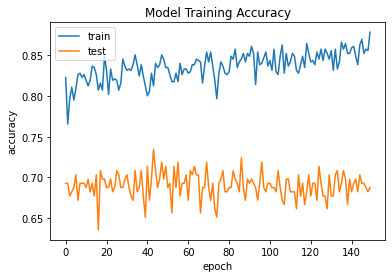

In [42]:
#plotting the accuracy for training and validation data
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Training Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
# plt.legend(['test'], loc='upper left')
plt.show()

In [43]:
#Printing the loss and accuracy using evlaute
print(my_db_nn.evaluate(X_test, Y_test))


6/6 [==============================] - 0s 3ms/step - loss: 0.8109 - acc: 0.6875
[0.8109345436096191, 0.6875]


In [44]:
# importing the StandardScaler from sklearn library
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# fitting and transforming the StandardScaler on train data and test data
X_train_transform=sc.fit_transform(X_train)
X_test_transform=sc.transform(X_test)

# The history object holds a record of the loss values and metric values during training
hist =  my_db_nn_fitted = my_db_nn.fit(X_train_transform, Y_train, epochs=150, verbose=1, shuffle=True)



Epoch 1/150
18/18 [==============================] - 0s 2ms/step - loss: 1.1224 - acc: 0.6545
Epoch 2/150
18/18 [==============================] - 0s 2ms/step - loss: 0.7032 - acc: 0.6406
Epoch 3/150
18/18 [==============================] - 0s 2ms/step - loss: 0.6090 - acc: 0.6528
Epoch 4/150
18/18 [==============================] - 0s 2ms/step - loss: 0.5543 - acc: 0.6875
Epoch 5/150
18/18 [==============================] - 0s 2ms/step - loss: 0.5152 - acc: 0.7240
Epoch 6/150
18/18 [==============================] - 0s 2ms/step - loss: 0.4923 - acc: 0.7413
Epoch 7/150
18/18 [==============================] - 0s 2ms/step - loss: 0.4776 - acc: 0.7396
Epoch 8/150
18/18 [==============================] - 0s 3ms/step - loss: 0.4606 - acc: 0.7587
Epoch 9/150
18/18 [==============================] - 0s 2ms/step - loss: 0.4517 - acc: 0.7691
Epoch 10/150
18/18 [==============================] - 0s 2ms/step - loss: 0.4421 - acc: 0.7778
Epoch 11/150
18/18 [==============================] - 0s 2m

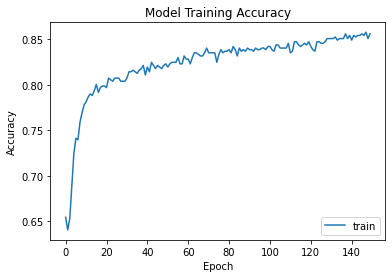

In [45]:
# Plotting the accuracy after normalization
plt.plot(hist.history['acc'])
plt.title('Model Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='lower right')
plt.show()

In [46]:
#Printing the loss and accuracy using evlaute
print(my_db_nn.evaluate(X_test_transform, Y_test))

6/6 [==============================] - 0s 2ms/step - loss: 0.5991 - acc: 0.7500
[0.5990858674049377, 0.75]
